# Problem Statement

2. The dataset consists of quarterly sales data of Coca-Cola from 1986 to 1996. Predict sales for the next two years by using time series forecasting and prepare a document for each model explaining how many dummy variables you have created and also include the RMSE value for each model.
   
Dataset:- CocaCola_Sales_RawData.xlsx

# Business Objective

To forecast the quarterly sales of Coca-Cola for the next two years using historical data from 1986 to 1996. This forecast will help in strategic planning for production, distribution, and marketing.



# Business Constraints

1. The model must be accurate and interpretable (low RMSE, clear seasonal trends).
2. Forecasts need to be quarter-specific, accounting for seasonal demand patterns.
3. Data availability is limited to just 11 years — only quarterly data from 1986 to 1996.
4. Model should handle seasonality (Q1, Q2, Q3, Q4).
5. The solution should be implementable using basic statistical/machine learning models without heavy computational resources.



In [49]:
import pandas as pd
import numpy as np

In [50]:
df=pd.read_excel("CocaCola_Sales_Rawdata (1).xlsx")
df.head()

,Quarter,Sales
0,Q1_86,1734.83
1,Q2_86,2244.96
2,Q3_86,2533.80
3,Q4_86,2154.96
4,Q1_87,1547.82


# Data Exploration

In [51]:
df.shape

(42, 2)

In [52]:
df.describe()

,Sales
count,42.000000
mean,2994.352857
std,977.931139
min,1547.820000
25%,2159.712500
50%,2782.375000
75%,3609.250000
max,5253.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [54]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [55]:
df.columns

Index(['Quarter', 'Sales'], dtype='object')

# Data Preprocessing

In [56]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Quarter    0
Sales      0
dtype: int64


In [57]:
# Extract the year and quarter from the 'Quarter' column
df['Quarters'] = df['Quarter'].apply(lambda x: x[:2])  # Extract first two characters (Q1, Q2, etc.)
df.drop(['Quarter'], axis=1, inplace=True)  # Drop the original 'Quarter' column

# Convert Data Column

In [58]:
# Create dummy variables for each quarter (Q1, Q2, Q3, Q4)
quarter_dummies = pd.get_dummies(df['Quarters'], prefix='Q')
df= pd.concat([df, quarter_dummies], axis=1)  # Add these dummy variables to the original dataframe


In [59]:
# Feature engineering: Create additional columns
df['t'] = np.arange(1, len(df) + 1)  # Create a time column 't'
df['t_squared'] = df['t']**2  # Create a squared time variable (quadratic trend)
df['log_Sales'] = np.log(df['Sales'])  # Log-transform sales data to stabilize variance

In [60]:
# Check the modified dataframe
print(df.head())

     Sales Quarters   Q_Q1   Q_Q2   Q_Q3   Q_Q4  t  t_squared  log_Sales
0  1734.83       Q1   True  False  False  False  1          1   7.458665
1  2244.96       Q2  False   True  False  False  2          4   7.716443
2  2533.80       Q3  False  False   True  False  3          9   7.837475
3  2154.96       Q4  False  False  False   True  4         16   7.675527
4  1547.82       Q1   True  False  False  False  5         25   7.344603


In [11]:
df.columns

Index(['Quarter', 'Sales', 'Q1', 'Q2', 'Q3', 'Q4'], dtype='object')

# Outlier Detection

In [61]:
# Calculate the IQR for the 'Sales' column to identify outliers
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

In [62]:
# Define the acceptable range for the 'Sales' data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [63]:
# Find and remove outliers based on the IQR
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]


In [64]:
# Remove outliers from the dataset
df_cleaned = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]


In [65]:
# Check the number of outliers removed
print(f"Outliers detected: {len(outliers)}")
print(f"Data points remaining after removing outliers: {len(df_cleaned)}")

Outliers detected: 0
Data points remaining after removing outliers: 42


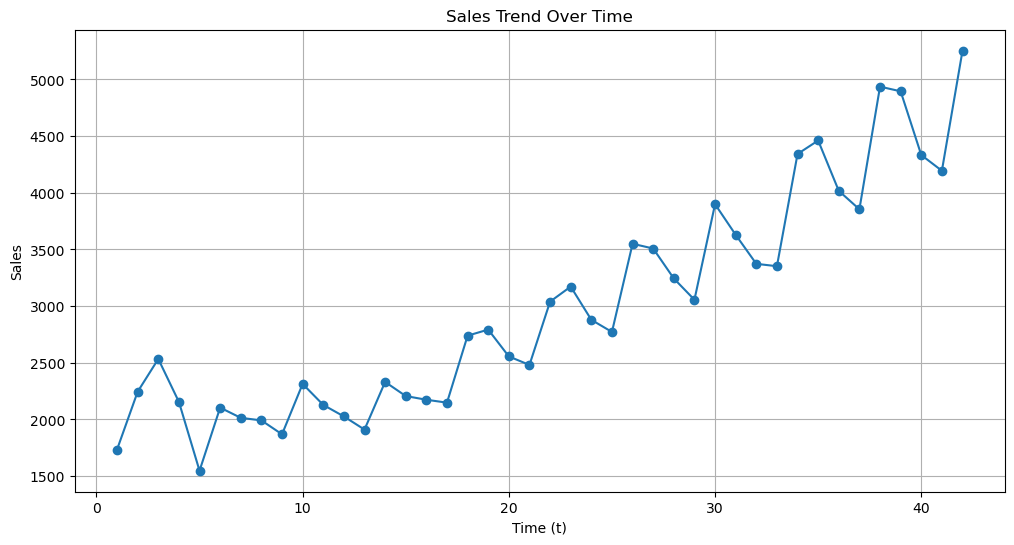

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot to visualize sales trend over time
plt.figure(figsize=(12,6))
plt.plot(df_cleaned['t'],df_cleaned['Sales'], marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Time (t)')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


# Seasonality

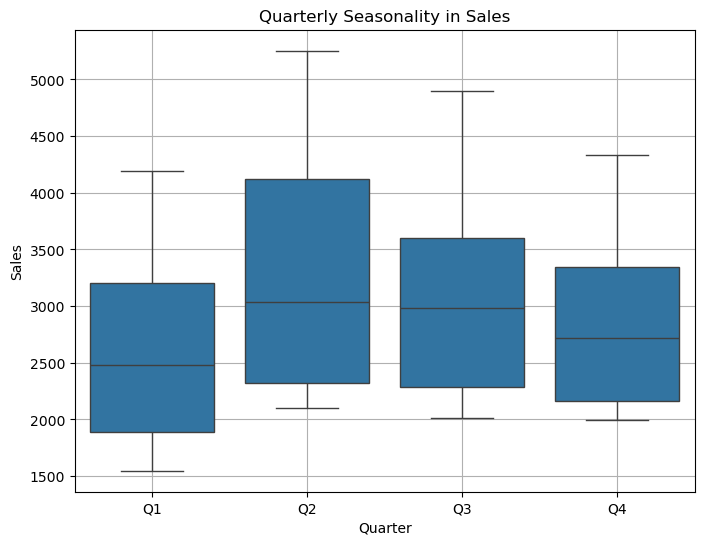

In [67]:
# Boxplot to visualize seasonality
plt.figure(figsize=(8,6))
sns.boxplot(x='Quarters', y='Sales', data=df_cleaned)
plt.title('Quarterly Seasonality in Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


# Model Building

# Moving Average Method

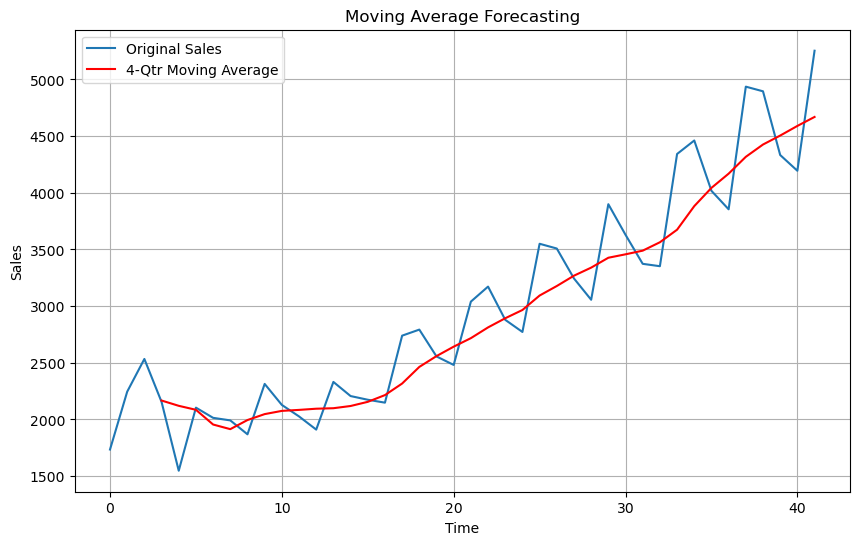

In [69]:
# 4-quarter Moving Average
df_cleaned['MA_4'] = df_cleaned['Sales'].rolling(window=4).mean()

# Plot moving average vs actual sales
plt.figure(figsize=(10,6))
plt.plot(df_cleaned['Sales'], label='Original Sales')
plt.plot(df_cleaned['MA_4'], color='red', label='4-Qtr Moving Average')
plt.title('Moving Average Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
df.head()

,Sales,Quarters,Q_Q1,Q_Q2,Q_Q3,Q_Q4,t,t_squared,log_Sales
0,1734.83,Q1,True,False,False,False,1,1,7.458665
1,2244.96,Q2,False,True,False,False,2,4,7.716443
2,2533.80,Q3,False,False,True,False,3,9,7.837475
3,2154.96,Q4,False,False,False,True,4,16,7.675527
4,1547.82,Q1,True,False,False,False,5,25,7.344603


# Train- Test Split

In [71]:
train=df.head(32)
test=df.tail(10)

# Data-Driven Model

# Build and Evaluate Models

# 1. Linear Trend

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from datetime import datetime
from sklearn.metrics import mean_squared_error

In [73]:
model1=ols('Sales ~ t',data=train).fit()
model1

In [74]:
pred1=model1.predict(test['t'])
pred1

32    3504.086230
33    3560.913766
34    3617.741303
35    3674.568840
36    3731.396376
37    3788.223913
38    3845.051450
39    3901.878986
40    3958.706523
41    4015.534060
dtype: float64

In [75]:
rmse1=np.sqrt(mean_squared_error(test['Sales'],pred1))
rmse1

752.9232436883036

# 2. Quadratic Trend

In [76]:
model2=ols('Sales ~ t + t_squared',data=train).fit()
model2

In [77]:
pred2=model2.predict(test[['t','t_squared']])
pred2

32    3899.008327
33    4027.639881
34    4160.495201
35    4297.574287
36    4438.877138
37    4584.403755
38    4734.154138
39    4888.128287
40    5046.326201
41    5208.747882
dtype: float64

In [78]:
rmse2=np.sqrt(mean_squared_error(test['Sales'],pred2))
rmse2

457.73613077455695

# 3. Additive Seasonality

In [85]:
#4. Additive Seasonality Model
model3 = smf.ols("Sales ~ Q_Q1 + Q_Q2 + Q_Q3 + Q_Q4", data=train).fit()
pred3= model3.predict(test[["Q_Q1", "Q_Q2", "Q_Q3", "Q_Q4"]])
rmse3 = np.sqrt(np.mean((test["Sales"] - pred3) ** 2))
rmse3

1850.4672343410155

# 4. Additive seasonality with linear trend

In [92]:
#Multiplicative Seasonality with Linear Trend
model4 = smf.ols("log_Sales ~ t + Q_Q1 + Q_Q2 + Q_Q3 + Q_Q4", data=train).fit()
pred4= np.exp(model4.predict(test))
rmse4 = np.sqrt(np.mean((test["Sales"] - pred4) ** 2))
rmse4

448.86809111888385

# 5.Additive Seasonality with quadratic trend


In [93]:
#6. Additive Seasonality with Quadratic Trend  (Best Model)
model5 = smf.ols("Sales ~ t + t_squared + Q_Q1 + Q_Q2 + Q_Q3 + Q_Q4", data=train).fit()
pred5= model5.predict(test[["t", "t_squared", "Q_Q1", "Q_Q2", "Q_Q3", "Q_Q4"]])
rmse5= np.sqrt(np.mean((test["Sales"] - pred5) ** 2))
rmse5

277.3520283554561

# 6.Multiplicative Seasonality

In [95]:
#Multiplicative Seasonality with Linear Trend
model6 = smf.ols("log_Sales ~ t + Q_Q1 + Q_Q2 + Q_Q3 + Q_Q4", data=train).fit()
pred6= np.exp(model6.predict(test))
rmse6 = np.sqrt(np.mean((test["Sales"] - pred6) ** 2))
rmse6

448.86809111888385

In [96]:
#Create Summary table

In [97]:
results=pd.DataFrame({
    'Model':['Linear Trend',
            'Quadratic TRend',
            'Additive Seasonality',
            'Additive Seasonality + Linear',
            'Additive Seasonality + Quadratic',
            'Multiplicative Seasonality',
            'Multiplicative Seasonality + Linear'
        ],
    'Dummy Variables': [0, 0, 12, 12, 12, 12, 12],
    'RMSE': [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7]  
})
print(results)

                                 Model  Dummy Variables         RMSE
0                         Linear Trend                0   752.923244
1                      Quadratic TRend                0   457.736131
2                 Additive Seasonality               12  1850.467234
3        Additive Seasonality + Linear               12   448.868091
4     Additive Seasonality + Quadratic               12   277.352028
5           Multiplicative Seasonality               12   448.868091
6  Multiplicative Seasonality + Linear               12   448.868091


In [99]:
#1 Create Future dates from 1997 to 1998()

# Forecasting next 8 quarters using the best model: Additive Seasonality + Quadratic Trend

import pandas as pd
import numpy as np
from statsmodels.formula.api import ols

In [100]:
final_model = smf.ols('Sales ~ t + t_squared + Q_Q1 + Q_Q2 + Q_Q3 + Q_Q4', data=df_cleaned).fit()


In [101]:
# Prepare future time periods (43 to 50)
future = pd.DataFrame({
    't': np.arange(43, 51),
})
future['t_squared'] = future['t']**2

# Repeat the quarter dummies (Q1 to Q4 for 2 years)
quarters = ['Q_Q1', 'Q_Q2', 'Q_Q3', 'Q_Q4'] * 2
for q in ['Q_Q1', 'Q_Q2', 'Q_Q3', 'Q_Q4']:
    future[q] = [1 if quarter == q else 0 for quarter in quarters]

# Forecast sales
forecast = final_model.predict(future)
future['Forecasted_Sales'] = forecast
print(future[['t', 'Forecasted_Sales']])


    t  Forecasted_Sales
0  43       4765.489043
1  44       5554.974289
2  45       5623.934493
3  46       5449.169043
4  47       5387.913393
5  48       6191.463065
6  49       6274.487693
7  50       6113.786668


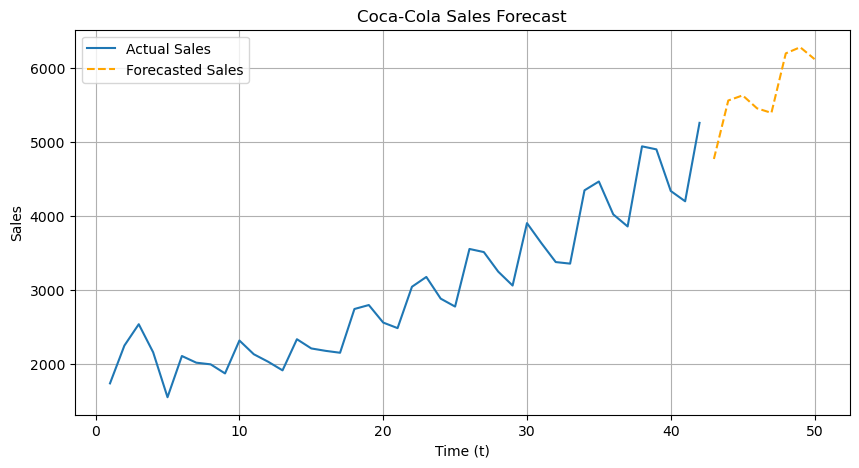

In [102]:
# Combine original and forecasted data for visualization
full_data = pd.concat([df_cleaned[['t', 'Sales']], future[['t', 'Forecasted_Sales']]], axis=0)

# Plot
plt.figure(figsize=(10,5))
plt.plot(full_data['t'], full_data['Sales'], label="Actual Sales")
plt.plot(full_data['t'], full_data['Forecasted_Sales'], label="Forecasted Sales", color='orange', linestyle='--')
plt.legend()
plt.title("Coca-Cola Sales Forecast")
plt.xlabel("Time (t)")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


# ARIMA (AutoRegressive Integrated Moving Average)

In [104]:
# 1. Check Stationarity with ADF Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_cleaned['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 1.3094222371368858
p-value: 0.9966611741003198


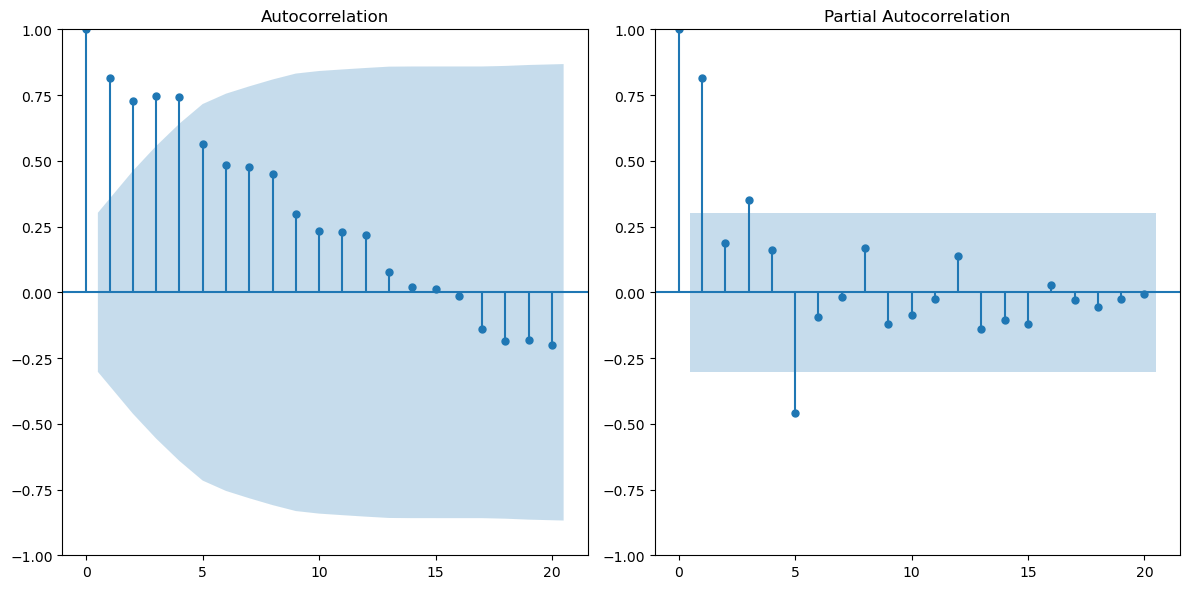

In [105]:
#B. Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_acf(df_cleaned['Sales'], lags=20, ax=plt.gca())
plt.subplot(1,2,2)
plot_pacf(df_cleaned['Sales'], lags=20, ax=plt.gca())
plt.tight_layout()
plt.show()


In [107]:
#C. Fit ARIMA / Auto ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# auto_arima to select the best parameters
auto_model = auto_arima(df_cleaned['Sales'], seasonal=True, m=4, trace=True,
                        error_action='ignore', suppress_warnings=True)

# Fitting the best ARIMA model
arima_model = ARIMA(df_cleaned['Sales'], order=auto_model.order)
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=8)
print("ARIMA Forecast:")
print(arima_forecast)

# Compare with actual (Test)
rmse_arima = np.sqrt(np.mean((test['Sales'].values - arima_forecast.values) ** 2))
print("RMSE - ARIMA:", round(rmse_arima, 2))


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[4]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=488.647, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=491.401, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=491.202, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=489.549, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=489.438, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=491.335, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=490.586, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=490.538, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[4]             : AIC=489.597, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[4] intercept   : AIC=490.419, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,1,0)[4]          
Total fit time: 1.191 seconds
ARIMA Forecast:
42    5253.0
43    5253.0
44    5253.0
45    5253.0
46    5253.0
47    5253.0
48    5253.0
49    5253.0
Name: predicted_mean, dtype: float64


ValueError: operands could not be broadcast together with shapes (10,) (8,) 